<a href="https://colab.research.google.com/github/Rajumiriyala1/machinelearning/blob/main/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predictions:
[[0.06187128]
 [0.94446675]
 [0.94407235]
 [0.05924452]]


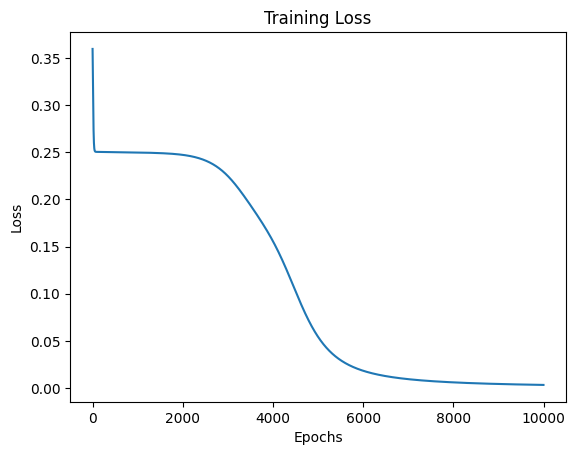

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Neural network architecture
input_size = 2
hidden_size = 4
output_size = 1

# Initialize weights and biases
weights_input_hidden = np.random.rand(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.rand(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Training parameters
epochs = 10000
learning_rate = 0.1

# Lists to store loss values for visualization
loss_history = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    # Calculate loss
    loss = np.mean(np.square(y - output_layer_output))
    loss_history.append(loss)

    # Backpropagation
    output_delta = (y - output_layer_output) * sigmoid_derivative(output_layer_output)
    hidden_layer_loss = output_delta.dot(weights_hidden_output.T)
    hidden_layer_delta = hidden_layer_loss * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(hidden_layer_delta) * learning_rate
    bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

# Test the trained neural network
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = sigmoid(np.dot(sigmoid(np.dot(test_input, weights_input_hidden) + bias_hidden), weights_hidden_output) + bias_output)
print("Predictions:")
print(predictions)

# Visualize the training loss
plt.plot(range(epochs), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
